In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 50

In [2]:
ca = pd.read_csv('./California/Occupational_Employment_and_Wage_Statistics__OEWS_.csv')
ct = pd.read_csv('./Connecticut/CT_Occupational_Employment___Wages__OES__-_2020-Q1.csv')
ny = pd.read_csv('./NewYork/Occupational_Employment_and_Wage_Statistics.csv')
wa = pd.read_csv('./Washington/Occupational_Employment_and_Wage_Estimates.csv')


In [3]:
ca['state']='ca'
wa['state']='wa'
ny['state']='ny'
ct['state']='ct'

In [4]:
ca.loc[ca['Wage Type']=='Annual wage or salary', 'Mean Wage']= ca[ca['Wage Type']=='Annual wage or salary']['Mean Wage']/2080

In [5]:
ca.loc[ca['Wage Type']=='Annual wage or salary', '10th Percentile Wage']= ca[ca['Wage Type']=='Annual wage or salary']['10th Percentile Wage']/2080
ca.loc[ca['Wage Type']=='Annual wage or salary', '25th Percentile Wage']= ca[ca['Wage Type']=='Annual wage or salary']['25th Percentile Wage']/2080
ca.loc[ca['Wage Type']=='Annual wage or salary', '50th Percentile (Median) Wage']= ca[ca['Wage Type']=='Annual wage or salary']['50th Percentile (Median) Wage']/2080
ca.loc[ca['Wage Type']=='Annual wage or salary', '75th Percentile Wage']= ca[ca['Wage Type']=='Annual wage or salary']['75th Percentile Wage']/2080
ca.loc[ca['Wage Type']=='Annual wage or salary', '90th Percentile Wage']= ca[ca['Wage Type']=='Annual wage or salary']['90th Percentile Wage']/2080

In [6]:
ca = ca[ca['Wage Type']!='Annual wage or salary']
#they're the same as hourly. Just multiplied to produce annual wage

In [7]:
ca.head()

,Area Type,Area Name,Year,Quarter,Industry Name,Standard Occupational Code,Occupational Title,Wage Type,Number of Employed,Mean Wage,10th Percentile Wage,25th Percentile Wage,50th Percentile (Median) Wage,75th Percentile Wage,90th Percentile Wage,Mean Relative Standard Error for Wage,state
0,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009,1st Qtr,"Total, All Industries",0,"Total, All Occupations",Hourly wage,1525490.0,23.25,8.85,11.14,17.56,29.12,44.67,0.84,ca
2,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009,1st Qtr,"Total, All Industries",110000,Management Occupations,Hourly wage,91260.0,56.62,24.04,34.48,50.61,72.58,0.00,0.80,ca
4,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009,1st Qtr,"Total, All Industries",111011,Chief Executives,Hourly wage,3640.0,0.00,62.22,0.00,0.00,0.00,0.00,1.65,ca
6,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009,1st Qtr,"Total, All Industries",111021,General and Operations Managers,Hourly wage,26830.0,63.75,27.47,37.26,55.89,0.00,0.00,1.30,ca
9,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009,1st Qtr,"Total, All Industries",112011,Advertising and Promotions Managers,Hourly wage,500.0,45.99,23.70,32.84,41.35,53.48,71.93,3.71,ca


In [8]:
ct.rename({'75%HourlyWage':'75th Percentile Wage', '75%AnnualWage':'ct 75%AnnualWage', '90%HourlyWage':'90th Percentile Wage',
       '90%AnnualWage':'ct 90%AnnualWage','10%HourlyWage':'10th Percentile Wage', '10%AnnualWage':'ct 10%AnnualWage',
       '25%HourlyWage':'25th Percentile Wage', '25%AnnualWage':'ct 25%AnnualWage',
           'Area':'Area Code', 'AreaName':'Area Name', 'SOC Code':'Standard Occupational Code', 'SOC Title':'Occupational Title','Employment':'Number of Employed','MeanHourlyWage':'Mean Wage','MedianHourlyWage':'50th Percentile (Median) Wage'}, axis=1, inplace=True)

In [9]:
ny['Mean Wage']=ny['Mean Wage']/2080
ny[' Median Wage']=ny[' Median Wage']/2080

In [10]:
ny.rename({' Area':'Area Code', ' Area Name':'Area Name', ' Standard Occupational Code':'Standard Occupational Code', ' Occupational Title':'Occupational Title',' Employment':'Number of Employed','Mean Wage':'Mean Wage',' Median Wage':'50th Percentile (Median) Wage',' Entry Wage':'NY Entry Wage',' Experienced Wage                                                                                                                                                                                                                                             ':'NY Exp Wage'}, axis=1, inplace=True)

In [11]:
ny.head()

,Area Type,Area Code,Area Name,Standard Occupational Code,Occupational Title,Number of Employed,Mean Wage,50th Percentile (Median) Wage,NY Entry Wage,NY Exp Wage,state
0,1,36,New York State,00-0000,"Total, All Occupations",8691440.0,33.475962,24.466346,30580.0,89160.0,ny
1,1,36,New York State,11-0000,Management Occupations,473070.0,79.317308,70.485577,80000.0,207470.0,ny
2,1,36,New York State,11-1011,Chief Executives,7280.0,106.346154,NaN,108850.0,277370.0,ny
3,1,36,New York State,11-1021,General and Operations Managers,158110.0,77.331731,66.211538,68470.0,207040.0,ny
4,1,36,New York State,11-1031,Legislators,6030.0,45.399038,46.235577,84450.0,99430.0,ny


In [12]:
wa.rename({'25th Percentile':'25th Percentile Wage','Annual wage':'wa Annual wage','75th Percentile':'75th Percentile Wage','ID':'wa ID','Area code':'Area Code', 'Area name':'Area Name', 'SOC code':'Standard Occupational Code', 'Occupational title':'Occupational Title','Employment':'Number of Employed','Average wage':'Mean Wage','50th Percentile':'50th Percentile (Median) Wage','Annual wage':'wa Annual wage'}, axis=1, inplace=True)

In [13]:
wa.head()

,wa ID,Year,Area Code,Area Name,Standard Occupational Code,Occupational Title,Number of Employed,Mean Wage,25th Percentile Wage,50th Percentile (Median) Wage,75th Percentile Wage,wa Annual wage,state
0,1,2021,53,Washington,11-1011,Chief Executives,2660.0,118.23,87.57,NaN,NaN,245907.0,wa
1,2,2021,53,Washington,11-1021,General and Operations Managers,49995.0,67.35,41.05,57.15,83.33,140081.0,wa
2,3,2021,53,Washington,11-1031,Legislators,953.0,NaN,NaN,NaN,NaN,121169.0,wa
3,4,2021,53,Washington,11-2011,Advertising and Promotions Managers,309.0,66.32,48.71,62.93,77.90,137957.0,wa
4,5,2021,53,Washington,11-2021,Marketing Managers,NaN,81.05,53.39,75.64,99.50,168580.0,wa


In [14]:
ct['Mean Wage'].replace('>100.00',100,inplace=True)
ct['Mean Wage'] = ct['Mean Wage'].astype(float)

In [15]:
df = pd.concat([ca,ct,ny,wa])
df = df[df['Occupational Title']!='Total, All Occupations']
df = df[df['Occupational Title']!='Total all occupations']
df = df[df['Occupational Title']!='Total, All Industries']
df.reset_index(drop=True, inplace=True)


df.head()

,Area Type,Area Name,Year,Quarter,Industry Name,Standard Occupational Code,Occupational Title,Wage Type,Number of Employed,Mean Wage,10th Percentile Wage,25th Percentile Wage,50th Percentile (Median) Wage,75th Percentile Wage,90th Percentile Wage,Mean Relative Standard Error for Wage,state,Area Code,MeanAnnualWage,EntryLevelHourlyWage,EntryLevelAnnualWage,ExperiencedLevelHourlyWage,ExperiencedLevelAnnualWage,ct 10%AnnualWage,ct 25%AnnualWage,MedianAnnualWage,ct 75%AnnualWage,ct 90%AnnualWage,NY Entry Wage,NY Exp Wage,wa ID,wa Annual wage
0,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",110000,Management Occupations,Hourly wage,91260.0,56.62,24.04,34.48,50.61,72.58,0.0,0.80,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",111011,Chief Executives,Hourly wage,3640.0,0.00,62.22,0.00,0.0,0.0,0.0,1.65,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",111021,General and Operations Managers,Hourly wage,26830.0,63.75,27.47,37.26,55.89,0.0,0.0,1.30,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",112011,Advertising and Promotions Managers,Hourly wage,500.0,45.99,23.7,32.84,41.35,53.48,71.93,3.71,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",112021,Marketing Managers,Hourly wage,3660.0,63.26,33.43,44.31,58.74,77.43,0.0,1.98,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df.columns

Index(['Area Type', 'Area Name', 'Year', 'Quarter', 'Industry Name',
       'Standard Occupational Code', 'Occupational Title', 'Wage Type',
       'Number of Employed', 'Mean Wage', '10th Percentile Wage',
       '25th Percentile Wage', '50th Percentile (Median) Wage',
       '75th Percentile Wage', '90th Percentile Wage',
       'Mean Relative Standard Error for Wage', 'state', 'Area Code',
       'MeanAnnualWage', 'EntryLevelHourlyWage', 'EntryLevelAnnualWage',
       'ExperiencedLevelHourlyWage', 'ExperiencedLevelAnnualWage',
       'ct 10%AnnualWage', 'ct 25%AnnualWage', 'MedianAnnualWage',
       'ct 75%AnnualWage', 'ct 90%AnnualWage', 'NY Entry Wage', 'NY Exp Wage',
       'wa ID', 'wa Annual wage'],
      dtype='object')

In [17]:
max(df['Mean Wage'])

162.60096153846155

In [18]:
df.groupby(['state','Occupational Title'])['Mean Wage'].mean()

state  Occupational Title                                                           
ca     Accountants and Auditors                                                         35.122404
       Actors                                                                           22.946000
       Actuaries                                                                        52.778681
       Acupuncturists and Healthcare Diagnosing or Treating Practitioners, All Other    42.896765
       Adhesive Bonding Machine Operators and Tenders                                   18.003200
                                                                                          ...    
wa     Woodworkers, All Other                                                           21.395000
       Woodworking Machine Setters, Operators, and Tenders, Except Sawing               19.390000
       Word Processors and Typists                                                      23.510000
       Writers and Authors       

In [19]:
a = df.groupby(['state','Occupational Title'])['Mean Wage'].mean().reset_index().sort_values(['state','Mean Wage'],ascending=False)

In [20]:
a.head()

,state,Occupational Title,Mean Wage
3084,wa,Orthodontists,135.900000
2585,wa,Anesthesiologists,128.705000
3253,wa,"Surgeons, Except Ophthalmologists",127.758333
3161,wa,Psychiatrists,122.437500
3067,wa,Obstetricians and Gynecologists,118.730000


In [21]:
a[a['state']=='wa'].head(10)

,state,Occupational Title,Mean Wage
3084,wa,Orthodontists,135.900000
2585,wa,Anesthesiologists,128.705000
3253,wa,"Surgeons, Except Ophthalmologists",127.758333
3161,wa,Psychiatrists,122.437500
3067,wa,Obstetricians and Gynecologists,118.730000
3122,wa,"Physicians, All Other and Ophthalmologists, Ex...",118.003125
2884,wa,General Internal Medicine Physicians,115.404000
2813,wa,Family Medicine Physicians,115.283333
3062,wa,Nurse Anesthetists,103.830000
2747,wa,"Dentists, General",102.868889


In [22]:
a[a['state']=='ca'].head(15)

,state,Occupational Title,Mean Wage
979,ca,"Surgeons, Except Ophthalmologists",115.621333
352,ca,Family Medicine Physicians,113.314545
791,ca,"Physicians, All Other; and Ophthalmologists, E...",111.984219
470,ca,General Internal Medicine Physicians,106.648182
716,ca,Nurse Anesthetists,97.425000
722,ca,Obstetricians and Gynecologists,93.470960
978,ca,Surgeons,91.611307
841,ca,Psychiatrists,90.945374
790,ca,"Physicians and Surgeons, All Other",90.315299
765,ca,"Pediatricians, General",90.282052


In [23]:
a[a['state']=='ny'].head(15)

,state,Occupational Title,Mean Wage
1801,ny,Anesthesiologists,128.527244
2493,ny,"Surgeons, Except Ophthalmologists",124.852710
2296,ny,Obstetricians and Gynecologists,120.457605
2315,ny,Orthodontists,116.424038
2393,ny,Psychiatrists,113.954108
2107,ny,General Internal Medicine Physicians,112.432692
2312,ny,Oral and Maxillofacial Surgeons,107.844952
2291,ny,Nurse Anesthetists,105.457212
1967,ny,"Dentists, All Other Specialists",105.177885
2352,ny,"Physicians, All Other; and Ophthalmologists, E...",103.277972


In [24]:
a[a['state']=='ct'].head(10)

,state,Occupational Title,Mean Wage
1636,ct,Psychiatrists,100.054000
1094,ct,Anesthesiologists,100.000000
1548,ct,Obstetricians and Gynecologists,100.000000
1566,ct,Orthodontists,100.000000
1168,ct,Chief Executives,97.842500
1381,ct,General Internal Medicine Physicians,96.728000
1543,ct,Nurse Anesthetists,92.545000
1251,ct,"Dentists, General",91.947143
1583,ct,"Pediatricians, General",90.982000
1446,ct,"Judges, Magistrate Judges, and Magistrates",90.170000


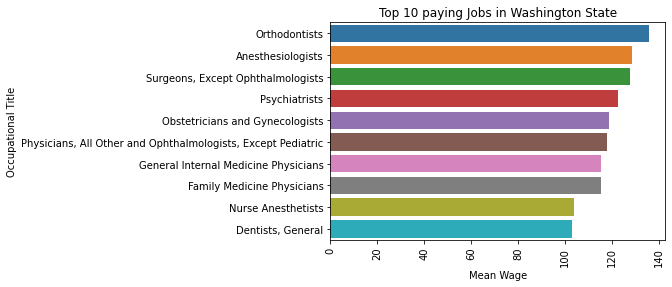

<Figure size 1080x360 with 0 Axes>

In [25]:
sns.barplot(y=a[a['state']=='wa'].head(10)['Occupational Title'], x=a[a['state']=='wa'].head(10)['Mean Wage'])
plt.title('Top 10 paying Jobs in Washington State')
plt.xticks(rotation=90)
plt.figure(figsize=(15,5))
plt.show()

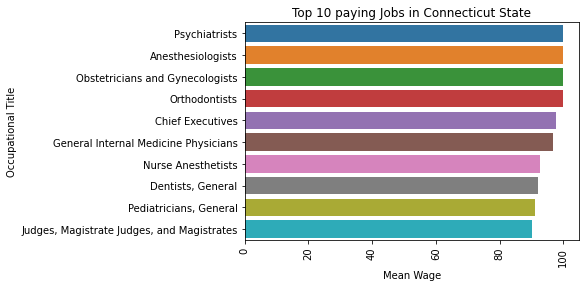

<Figure size 1080x360 with 0 Axes>

In [26]:
sns.barplot(y=a[a['state']=='ct'].head(10)['Occupational Title'], x=a[a['state']=='ct'].head(10)['Mean Wage'])
plt.title('Top 10 paying Jobs in Connecticut State')
plt.xticks(rotation=90)
plt.figure(figsize=(15,5))
plt.show()

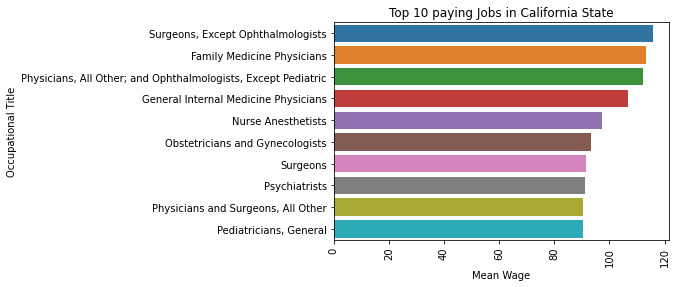

<Figure size 1080x360 with 0 Axes>

In [27]:
sns.barplot(y=a[a['state']=='ca'].head(10)['Occupational Title'], x=a[a['state']=='ca'].head(10)['Mean Wage'])
plt.title('Top 10 paying Jobs in California State')
plt.xticks(rotation=90)
plt.figure(figsize=(15,5))
plt.show()

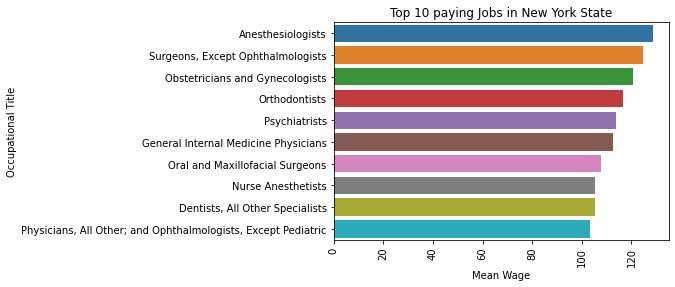

<Figure size 1080x360 with 0 Axes>

In [28]:
sns.barplot(y=a[a['state']=='ny'].head(10)['Occupational Title'], x=a[a['state']=='ny'].head(10)['Mean Wage'])
plt.title('Top 10 paying Jobs in New York State')
plt.xticks(rotation=90)
plt.figure(figsize=(15,5))
plt.show()

In [29]:
b = df.groupby(['state','Occupational Title','Year'])['Mean Wage'].mean().reset_index().sort_values(['state','Occupational Title','Year'])


In [30]:
c = df.groupby(['state','Occupational Title', 'Year'])['Mean Wage'].mean().reset_index().sort_values(['state','Mean Wage'],ascending=False)


In [31]:
o = a[a['state']=='ca'].head(10)['Occupational Title']

In [32]:
o.head()

979                    Surgeons, Except Ophthalmologists
352                           Family Medicine Physicians
791    Physicians, All Other; and Ophthalmologists, E...
470                 General Internal Medicine Physicians
716                                   Nurse Anesthetists
Name: Occupational Title, dtype: object

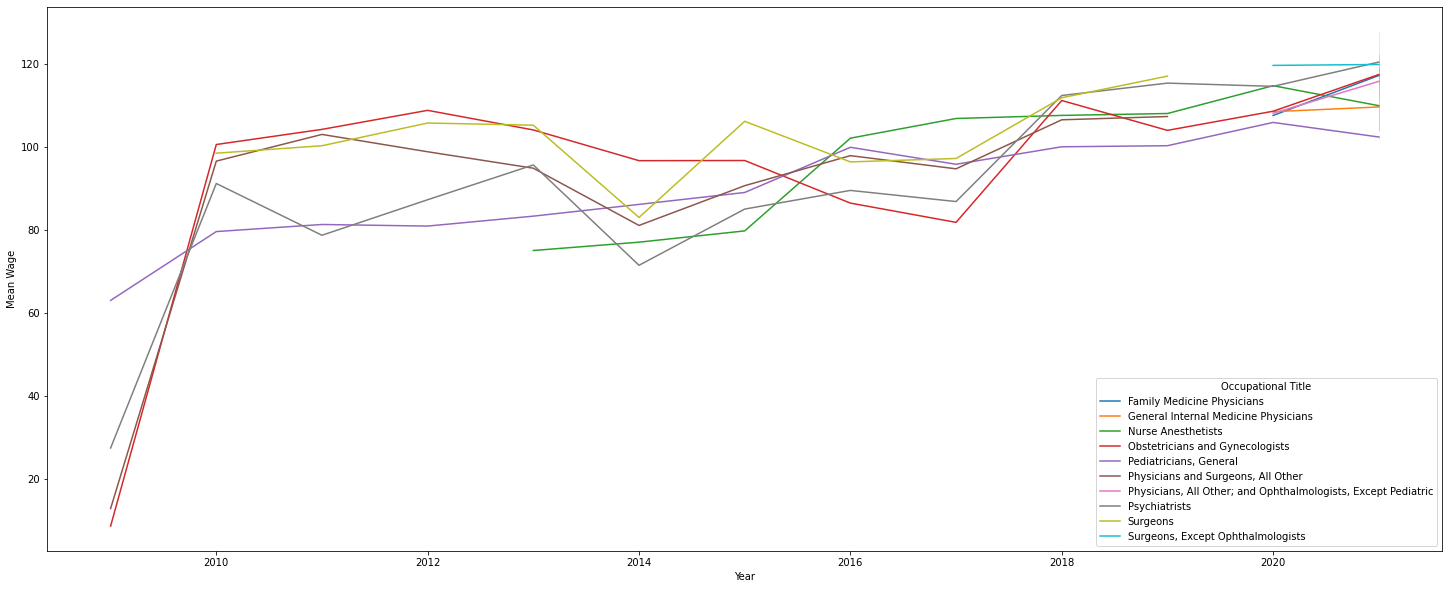

In [33]:
b = b[b['Mean Wage']>0]
fig, ax = plt.subplots(figsize=(25,10))

sns.lineplot(ax=ax,data=b[b['Occupational Title'].isin(o)],x='Year',y='Mean Wage',hue='Occupational Title')
plt.show()

In [34]:
c = df.groupby(['state','Occupational Title','Year'])['Number of Employed'].mean().reset_index().sort_values(['state','Number of Employed'],ascending=False)

c.head()

,state,Occupational Title,Year,Number of Employed
11088,wa,Software Developers and Software Quality Assur...,2021.0,14233.133333
10676,wa,Fast Food and Counter Workers,2021.0,13423.750000
11047,wa,Retail Salespersons,2021.0,13120.187500
10928,wa,"Office Clerks, General",2021.0,9187.437500
11040,wa,Registered Nurses,2021.0,8647.812500


In [35]:
d = c[c['state']=='ca'].head(100)['Occupational Title']

In [36]:
d.head()

7024    Office and Administrative Support Occupations
7025    Office and Administrative Support Occupations
7034    Office and Administrative Support Occupations
7030    Office and Administrative Support Occupations
7026    Office and Administrative Support Occupations
Name: Occupational Title, dtype: object

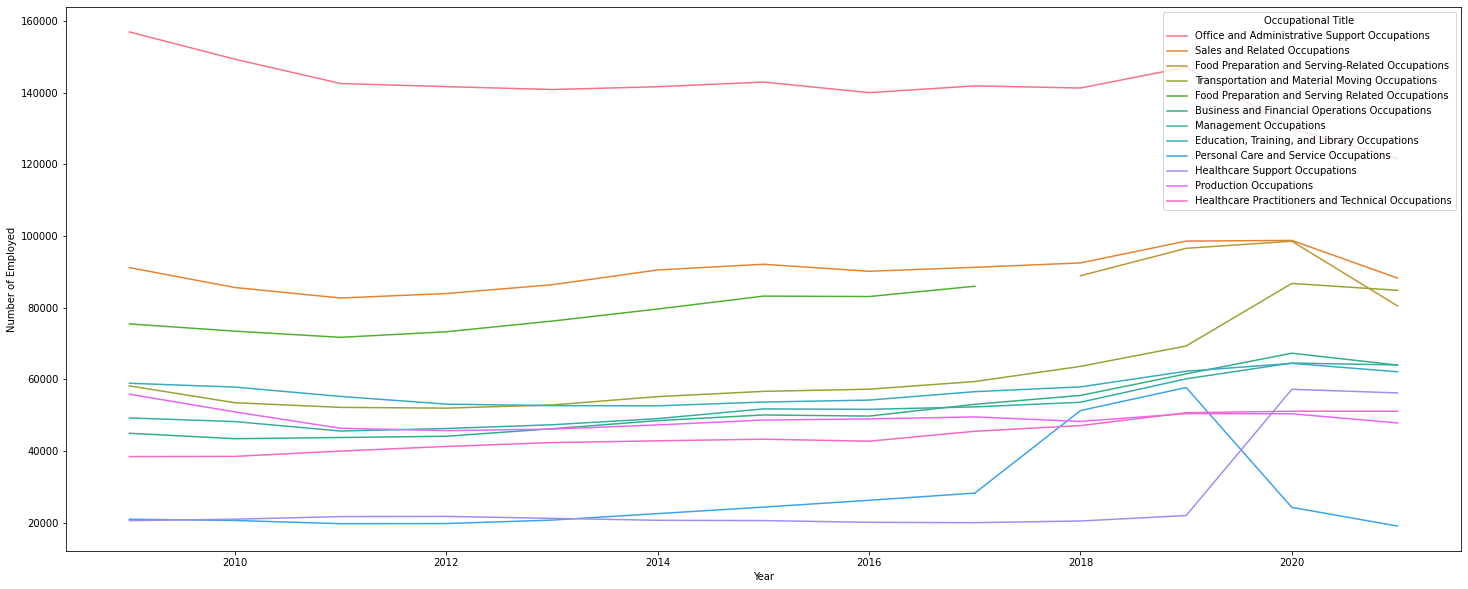

In [37]:
fig, ax = plt.subplots(figsize=(25,10))

sns.lineplot(ax=ax,data=c[c['Occupational Title'].isin(d)],x='Year',y='Number of Employed',hue='Occupational Title')
plt.show()

/Users/shanmukhayenneti/Library/Python/3.8/lib/python/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Mean Wage'>

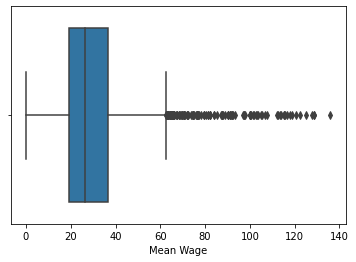

In [38]:
sns.boxplot(a['Mean Wage'])

In [39]:
df.head()

,Area Type,Area Name,Year,Quarter,Industry Name,Standard Occupational Code,Occupational Title,Wage Type,Number of Employed,Mean Wage,10th Percentile Wage,25th Percentile Wage,50th Percentile (Median) Wage,75th Percentile Wage,90th Percentile Wage,Mean Relative Standard Error for Wage,state,Area Code,MeanAnnualWage,EntryLevelHourlyWage,EntryLevelAnnualWage,ExperiencedLevelHourlyWage,ExperiencedLevelAnnualWage,ct 10%AnnualWage,ct 25%AnnualWage,MedianAnnualWage,ct 75%AnnualWage,ct 90%AnnualWage,NY Entry Wage,NY Exp Wage,wa ID,wa Annual wage
0,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",110000,Management Occupations,Hourly wage,91260.0,56.62,24.04,34.48,50.61,72.58,0.0,0.80,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",111011,Chief Executives,Hourly wage,3640.0,0.00,62.22,0.00,0.0,0.0,0.0,1.65,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",111021,General and Operations Managers,Hourly wage,26830.0,63.75,27.47,37.26,55.89,0.0,0.0,1.30,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",112011,Advertising and Promotions Managers,Hourly wage,500.0,45.99,23.7,32.84,41.35,53.48,71.93,3.71,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2009.0,1st Qtr,"Total, All Industries",112021,Marketing Managers,Hourly wage,3660.0,63.26,33.43,44.31,58.74,77.43,0.0,1.98,ca,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# % missing valus in each column

In [40]:
(df.isna().sum()/len(df))*100

Area Type                                 4.588666
Area Name                                 0.000000
Year                                      4.616097
Quarter                                   7.554840
Industry Name                             7.554840
Standard Occupational Code                0.000000
Occupational Title                        0.000000
Wage Type                                 7.554840
Number of Employed                        4.012160
Mean Wage                                 2.038458
10th Percentile Wage                      7.722126
25th Percentile Wage                      5.052299
50th Percentile (Median) Wage             2.261955
75th Percentile Wage                      5.462419
90th Percentile Wage                      8.787448
Mean Relative Standard Error for Wage     8.141240
state                                     0.000000
Area Code                                92.445160
MeanAnnualWage                           98.400892
EntryLevelHourlyWage           

In [41]:
df.columns

Index(['Area Type', 'Area Name', 'Year', 'Quarter', 'Industry Name',
       'Standard Occupational Code', 'Occupational Title', 'Wage Type',
       'Number of Employed', 'Mean Wage', '10th Percentile Wage',
       '25th Percentile Wage', '50th Percentile (Median) Wage',
       '75th Percentile Wage', '90th Percentile Wage',
       'Mean Relative Standard Error for Wage', 'state', 'Area Code',
       'MeanAnnualWage', 'EntryLevelHourlyWage', 'EntryLevelAnnualWage',
       'ExperiencedLevelHourlyWage', 'ExperiencedLevelAnnualWage',
       'ct 10%AnnualWage', 'ct 25%AnnualWage', 'MedianAnnualWage',
       'ct 75%AnnualWage', 'ct 90%AnnualWage', 'NY Entry Wage', 'NY Exp Wage',
       'wa ID', 'wa Annual wage'],
      dtype='object')

In [42]:
new_df = df[['Area Type', 'Area Name', 'Year', 'Quarter', 'Industry Name',
       'Standard Occupational Code', 'Occupational Title', 'Wage Type',
       'Number of Employed', 'Mean Wage', '10th Percentile Wage',
       '25th Percentile Wage', '50th Percentile (Median) Wage',
       '75th Percentile Wage', '90th Percentile Wage',
       'Mean Relative Standard Error for Wage', 'state']]

# Filling NaN Years with 2021 (years are missing becaue the data is only from 2021

In [43]:
new_df['Year'].fillna(value=2021.0, inplace=True)

/Users/shanmukhayenneti/Library/Python/3.8/lib/python/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [44]:
new_df.Year.unique()

array([2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020., 2021.])

In [45]:
new_df.Quarter.unique()

array(['1st Qtr', '1st Qrt', nan], dtype=object)

In [46]:
new_df.Year.dtype

dtype('float64')

In [47]:
new_df.describe()

,Year,Number of Employed,Mean Wage,25th Percentile Wage,Mean Relative Standard Error for Wage
count,222374.000000,2.134520e+05,217841.000000,211139.000000,204270.000000
mean,2015.508585,3.900901e+03,27.617033,20.329497,5.823339
std,3.889933,3.640216e+04,16.483546,11.566863,4.238765
min,2009.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2012.000000,6.000000e+01,16.710000,12.570000,3.040000
50%,2016.000000,2.200000e+02,23.610000,17.280000,4.600000
75%,2019.000000,1.010000e+03,34.720000,25.590000,7.290000
max,2021.000000,2.675940e+06,162.600962,101.930000,83.300000


# Consider just 2021

In [215]:
late_df = new_df[new_df['Year']==2021.0]

In [216]:
late_df['Occupational Title'].unique()

array(['Management Occupations', 'Chief Executives',
       'General and Operations Managers', 'Legislators',
       'Advertising and Promotions Managers', 'Marketing Managers',
       'Sales Managers', 'Public Relations and Fundraising Managers',
       'Administrative Services and Facilities Managers',
       'Computer and Information Systems Managers', 'Financial Managers',
       'Industrial Production Managers', 'Purchasing Managers',
       'Transportation, Storage, and Distribution Managers',
       'Compensation and Benefits Managers', 'Human Resources Managers',
       'Training and Development Managers',
       'Farmers, Ranchers, and Other Agricultural Managers',
       'Construction Managers',
       'Education and Childcare Administrators, Preschool and Daycare',
       'Education Administrators, Kindergarten through Secondary',
       'Education Administrators, Postsecondary',
       'Education Administrators, All Other',
       'Architectural and Engineering Managers', '

In [217]:
late_df.head()

,Area Type,Area Name,Year,Quarter,Industry Name,Standard Occupational Code,Occupational Title,Wage Type,Number of Employed,Mean Wage,10th Percentile Wage,25th Percentile Wage,50th Percentile (Median) Wage,75th Percentile Wage,90th Percentile Wage,Mean Relative Standard Error for Wage,state
190101,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",110000,Management Occupations,Hourly wage,106240.0,69.56,28.5,41.16,62.43,87.87,NaN,1.07,ca
190102,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111011,Chief Executives,Hourly wage,3230.0,116.45,45.51,70.47,NaN,NaN,NaN,7.77,ca
190103,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111021,General and Operations Managers,Hourly wage,27270.0,69.21,27.55,37.02,56.75,90.06,NaN,2.97,ca
190104,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111031,Legislators,Hourly wage,180.0,NaN,NaN,NaN,NaN,NaN,NaN,7.28,ca
190105,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",112011,Advertising and Promotions Managers,Hourly wage,290.0,71.94,45.66,55.84,69.26,80.21,100.24,3.57,ca


In [218]:
late_df['Occupational Title']=late_df['Occupational Title'].str.lower()

/var/folders/z3/714_8b116958htby8z2qn_p00000gn/T/ipykernel_19458/4231471666.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  late_df['Occupational Title']=late_df['Occupational Title'].str.lower()


In [219]:
#late_df.merge(titles,left_on=['Standard Occupational Code','Occupational Title'],right_on=['OCC_CODE','OCC_TITLE'],copy=False)

In [220]:
late_df

,Area Type,Area Name,Year,Quarter,Industry Name,Standard Occupational Code,Occupational Title,Wage Type,Number of Employed,Mean Wage,10th Percentile Wage,25th Percentile Wage,50th Percentile (Median) Wage,75th Percentile Wage,90th Percentile Wage,Mean Relative Standard Error for Wage,state
190101,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",110000,management occupations,Hourly wage,106240.0,69.56,28.5,41.16,62.43,87.87,NaN,1.07,ca
190102,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111011,chief executives,Hourly wage,3230.0,116.45,45.51,70.47,NaN,NaN,NaN,7.77,ca
190103,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111021,general and operations managers,Hourly wage,27270.0,69.21,27.55,37.02,56.75,90.06,NaN,2.97,ca
190104,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111031,legislators,Hourly wage,180.0,NaN,NaN,NaN,NaN,NaN,NaN,7.28,ca
190105,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",112011,advertising and promotions managers,Hourly wage,290.0,71.94,45.66,55.84,69.26,80.21,100.24,3.57,ca
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222369,NaN,Eastern Washington nonmetropolitan area,2021.0,NaN,NaN,53-7062,"laborers and freight, stock, and material move...",NaN,1513.0,19.39,NaN,15.12,16.99,20.49,NaN,NaN,wa
222370,NaN,Eastern Washington nonmetropolitan area,2021.0,NaN,NaN,53-7063,machine feeders and offbearers,NaN,37.0,17.18,NaN,14.73,16.02,19.09,NaN,NaN,wa
222371,NaN,Eastern Washington nonmetropolitan area,2021.0,NaN,NaN,53-7064,"packers and packagers, hand",NaN,1009.0,14.89,NaN,13.92,14.27,15.37,NaN,NaN,wa
222372,NaN,Eastern Washington nonmetropolitan area,2021.0,NaN,NaN,53-7065,stockers and order fillers,NaN,980.0,16.60,NaN,14.59,15.38,16.54,NaN,NaN,wa


In [221]:
late_df.reset_index(inplace=True, drop=True)

In [222]:
late_df.head()

,Area Type,Area Name,Year,Quarter,Industry Name,Standard Occupational Code,Occupational Title,Wage Type,Number of Employed,Mean Wage,10th Percentile Wage,25th Percentile Wage,50th Percentile (Median) Wage,75th Percentile Wage,90th Percentile Wage,Mean Relative Standard Error for Wage,state
0,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",110000,management occupations,Hourly wage,106240.0,69.56,28.5,41.16,62.43,87.87,NaN,1.07,ca
1,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111011,chief executives,Hourly wage,3230.0,116.45,45.51,70.47,NaN,NaN,NaN,7.77,ca
2,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111021,general and operations managers,Hourly wage,27270.0,69.21,27.55,37.02,56.75,90.06,NaN,2.97,ca
3,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111031,legislators,Hourly wage,180.0,NaN,NaN,NaN,NaN,NaN,NaN,7.28,ca
4,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",112011,advertising and promotions managers,Hourly wage,290.0,71.94,45.66,55.84,69.26,80.21,100.24,3.57,ca


In [223]:
late_df.isna().sum()/len(late_df)

Area Type                                0.316178
Area Name                                0.000000
Year                                     0.000000
Quarter                                  0.520559
Industry Name                            0.520559
Standard Occupational Code               0.000000
Occupational Title                       0.000000
Wage Type                                0.520559
Number of Employed                       0.119543
Mean Wage                                0.053078
10th Percentile Wage                     0.444582
25th Percentile Wage                     0.259009
50th Percentile (Median) Wage            0.060112
75th Percentile Wage                     0.268770
90th Percentile Wage                     0.465714
Mean Relative Standard Error for Wage    0.523162
state                                    0.000000
dtype: float64

In [224]:
demo = pd.read_csv('cpsaat11b.csv')
demo.head()

,Occupational Title,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age
0,Management occupations,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9
1,Chief executives,"1,669",0,7,138,368,465,463,227,52.0
2,General and operations managers,"1,057",3,25,250,290,255,195,39,44.2
3,Legislators,25,0,2,6,1,3,5,8,–
4,Advertising and promotions managers,56,1,1,22,19,11,1,1,36.6


In [225]:
demo['Occupational Title']=demo['Occupational Title'].str.lower()

In [235]:
data = late_df.merge(demo,on='Occupational Title',how ='left')

In [236]:
data.head()

,Area Type,Area Name,Year,Quarter,Industry Name,Standard Occupational Code,Occupational Title,Wage Type,Number of Employed,Mean Wage,10th Percentile Wage,25th Percentile Wage,50th Percentile (Median) Wage,75th Percentile Wage,90th Percentile Wage,Mean Relative Standard Error for Wage,state,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age
0,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",110000,management occupations,Hourly wage,106240.0,69.56,28.5,41.16,62.43,87.87,NaN,1.07,ca,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9
1,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111011,chief executives,Hourly wage,3230.0,116.45,45.51,70.47,NaN,NaN,NaN,7.77,ca,"1,669",0,7,138,368,465,463,227,52.0
2,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111021,general and operations managers,Hourly wage,27270.0,69.21,27.55,37.02,56.75,90.06,NaN,2.97,ca,"1,057",3,25,250,290,255,195,39,44.2
3,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111031,legislators,Hourly wage,180.0,NaN,NaN,NaN,NaN,NaN,NaN,7.28,ca,25,0,2,6,1,3,5,8,–
4,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",112011,advertising and promotions managers,Hourly wage,290.0,71.94,45.66,55.84,69.26,80.21,100.24,3.57,ca,56,1,1,22,19,11,1,1,36.6


In [237]:
data.sort_values(by='Median age', ascending=False).reset_index(inplace=True,drop=True)

In [238]:
data['Median age'].unique()

array(['46.9', '52.0', '44.2', '–', '36.6', '39.7', '45.5', '43.0', nan,
       '45.4', '47.0', '49.3', '44.1', '45.1', '39.0', '56.8', '46.1',
       '49.1', '40.2', '48.0', '45.9', '49.6', '46.6', '43.4', '45.7',
       '42.9', '45.3', '38.8', '43.7', '47.7', '44.0', '36.5', '52.1',
       '48.3', '47.2', '47.4', '50.4', '40.6', '40.9', '41.2', '43.8',
       '42.8', '42.3', '43.1', '41.5', '44.9', '43.9', '39.2', '41.9',
       '42.7', '41.1', '40.3', '43.5', '46.3', '40.5', '39.4', '37.6',
       '42.0', '44.3', '51.9', '44.8', '49.7', '46.5', '47.1', '44.6',
       '48.2', '38.4', '40.4', '31.7', '40.7', '45.0', '35.6', '46.7',
       '41.0', '42.4', '41.7', '40.1', '42.6', '44.5', '45.8', '34.2',
       '31.0', '39.5', '30.3', '36.0', '35.9', '28.5', '41.3', '46.4',
       '40.0', '43.6', '42.1', '35.3', '29.6', '34.0', '22.4', '25.2',
       '33.1', '28.3', '21.1', '48.7', '38.0', '39.1', '31.6', '43.3',
       '38.3', '24.8', '42.2', '45.6', '53.0', '46.8', '31.9', '48.9',
    

In [239]:
data.head()

,Area Type,Area Name,Year,Quarter,Industry Name,Standard Occupational Code,Occupational Title,Wage Type,Number of Employed,Mean Wage,10th Percentile Wage,25th Percentile Wage,50th Percentile (Median) Wage,75th Percentile Wage,90th Percentile Wage,Mean Relative Standard Error for Wage,state,"Total, 16 years and over",16 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 64 years,65 years and over,Median age
0,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",110000,management occupations,Hourly wage,106240.0,69.56,28.5,41.16,62.43,87.87,NaN,1.07,ca,"18,564",59,515,"3,285","4,520","4,733","3,799","1,653",46.9
1,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111011,chief executives,Hourly wage,3230.0,116.45,45.51,70.47,NaN,NaN,NaN,7.77,ca,"1,669",0,7,138,368,465,463,227,52.0
2,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111021,general and operations managers,Hourly wage,27270.0,69.21,27.55,37.02,56.75,90.06,NaN,2.97,ca,"1,057",3,25,250,290,255,195,39,44.2
3,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",111031,legislators,Hourly wage,180.0,NaN,NaN,NaN,NaN,NaN,NaN,7.28,ca,25,0,2,6,1,3,5,8,–
4,Metropolitan Area,Anaheim-Santa Ana-Irvine MD,2021.0,1st Qrt,"Total, All Industries",112011,advertising and promotions managers,Hourly wage,290.0,71.94,45.66,55.84,69.26,80.21,100.24,3.57,ca,56,1,1,22,19,11,1,1,36.6


In [240]:
data.isna().sum()/len(data)

Area Type                                0.316178
Area Name                                0.000000
Year                                     0.000000
Quarter                                  0.520559
Industry Name                            0.520559
Standard Occupational Code               0.000000
Occupational Title                       0.000000
Wage Type                                0.520559
Number of Employed                       0.119543
Mean Wage                                0.053078
10th Percentile Wage                     0.444582
25th Percentile Wage                     0.259009
50th Percentile (Median) Wage            0.060112
75th Percentile Wage                     0.268770
90th Percentile Wage                     0.465714
Mean Relative Standard Error for Wage    0.523162
state                                    0.000000
Total, 16 years and over                 0.397825
16 to 19 years                           0.397825
20 to 24 years                           0.397825


In [241]:
data['Area Type'].unique()

array(['Metropolitan Area', 'California-Statewide', 'OES Survey Region',
       nan, 1, 10], dtype=object)

In [242]:
del data['Area Name']
del data['Industry Name']
del data['10th Percentile Wage']
del data['25th Percentile Wage']
del data['75th Percentile Wage']
del data['Area Type']
del data['Mean Relative Standard Error for Wage']

In [244]:
del data['Total, 16 years and over']
del data['16 to 19 years']
del data['20 to 24 years']
del data['25 to 34 years']
del data['35 to 44 years']
del data['45 to 54 years']
del data['55 to 64 years']
del data['65 years and over']
del data['Wage Type']

In [250]:
del data['Quarter']

In [251]:
data.head()

,Year,Standard Occupational Code,Occupational Title,Number of Employed,Mean Wage,50th Percentile (Median) Wage,90th Percentile Wage,state,Median age
0,2021.0,110000,management occupations,106240.0,69.56,62.43,NaN,ca,46.9
1,2021.0,111011,chief executives,3230.0,116.45,NaN,NaN,ca,52.0
2,2021.0,111021,general and operations managers,27270.0,69.21,56.75,NaN,ca,44.2
3,2021.0,111031,legislators,180.0,NaN,NaN,NaN,ca,–
4,2021.0,112011,advertising and promotions managers,290.0,71.94,69.26,100.24,ca,36.6


In [252]:
data.isna().sum()/len(data)

Year                             0.000000
Standard Occupational Code       0.000000
Occupational Title               0.000000
Number of Employed               0.119543
Mean Wage                        0.053078
50th Percentile (Median) Wage    0.060112
90th Percentile Wage             0.465714
state                            0.000000
Median age                       0.397825
dtype: float64

In [253]:
edu = pd.read_csv('education.csv')
edu.head()

,Occupational Title,2020 National Employment Matrix code,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,Chief executives,11-1011,Bachelor's degree,5 years or more,None
1,General and operations managers,11-1021,Bachelor's degree,5 years or more,None
2,Legislators,11-1031,Bachelor's degree,Less than 5 years,None
3,Advertising and promotions managers,11-2011,Bachelor's degree,Less than 5 years,None
4,Marketing managers,11-2021,Bachelor's degree,5 years or more,None


In [254]:
edu['Occupational Title']=edu['Occupational Title'].str.lower()

In [255]:
data = data.merge(edu[['Occupational Title','Typical education needed for entry','Work experience in a related occupation','Typical on-the-job training needed to attain competency in the occupation']],on='Occupational Title',how ='left')

In [256]:
data.head()

,Year,Standard Occupational Code,Occupational Title,Number of Employed,Mean Wage,50th Percentile (Median) Wage,90th Percentile Wage,state,Median age,Typical education needed for entry,Work experience in a related occupation,Typical on-the-job training needed to attain competency in the occupation
0,2021.0,110000,management occupations,106240.0,69.56,62.43,NaN,ca,46.9,NaN,NaN,NaN
1,2021.0,111011,chief executives,3230.0,116.45,NaN,NaN,ca,52.0,Bachelor's degree,5 years or more,None
2,2021.0,111021,general and operations managers,27270.0,69.21,56.75,NaN,ca,44.2,Bachelor's degree,5 years or more,None
3,2021.0,111031,legislators,180.0,NaN,NaN,NaN,ca,–,Bachelor's degree,Less than 5 years,None
4,2021.0,112011,advertising and promotions managers,290.0,71.94,69.26,100.24,ca,36.6,Bachelor's degree,Less than 5 years,None


In [258]:
data.shape

(32273, 12)